In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
d_parser = lambda x : pd.datetime.strptime (x, '%Y-%m-%d')
df = pd.read_csv ('../data/cleanedMovieData.csv', parse_dates = ['release_date'], date_parser = d_parser)
df.drop (columns= ['Unnamed: 0'], inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45376 non-null  int64         
 1   genres                45376 non-null  object        
 2   imdb_id               45362 non-null  object        
 3   original_language     45365 non-null  object        
 4   original_title        45376 non-null  object        
 5   popularity            45376 non-null  float64       
 6   production_companies  45376 non-null  object        
 7   production_countries  45376 non-null  object        
 8   release_date          45376 non-null  datetime64[ns]
 9   revenue               7407 non-null   float64       
 10  runtime               45130 non-null  float64       
 11  spoken_languages      45376 non-null  object        
 12  title                 45376 non-null  object        
 13  vote_average    

In [77]:
import ast

In [78]:
df['production_countries'] = df.production_countries.apply (lambda x : ast.literal_eval (x))

In [79]:
def get_country (cunt_list):
    for item in cunt_list:
        return item['name']

In [80]:
df['production_countries'] = df['production_countries'].apply (get_country)

In [81]:
df['production_countries'].value_counts().head(10)

United States of America    18420
United Kingdom               3067
France                       2704
Canada                       1498
Japan                        1493
Italy                        1470
Germany                      1418
Russia                        799
India                         782
Spain                         601
Name: production_countries, dtype: int64

In [82]:
country_USA = df[df.production_countries == 'United States of America']
country_IND = df[df.production_countries == 'India']

In [90]:
from collections import Counter
import ast

In [93]:
country_IND['genres'] = country_IND.genres.apply (lambda x : ast.literal_eval(x))

In [94]:
genres_list = country_IND.loc[country_IND.release_date > '2000'].genres

In [95]:
indian_genres = Counter()
for item in list(genres_list):
    indian_genres.update (item)

In [99]:
genres_IN = []
num_IN = []
for elem in indian_genres.most_common (5):
    genres_IN.append (elem[0])
    num_IN.append (elem[1])


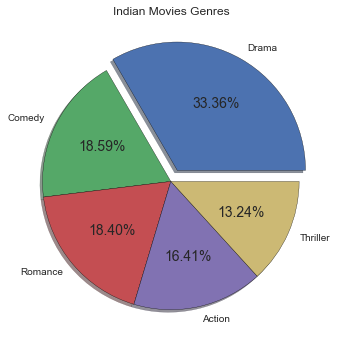

In [103]:
plt.style.use('seaborn')
plt.title ('Indian Movies Genres')
# plt.rc (font)
explode = (0.1, 0, 0, 0, 0)
plt.pie (num_IN, labels = genres_IN, explode = explode, shadow=True, autopct='%1.2f%%', wedgeprops={'edgecolor':'black'})
plt.savefig ('../Visualplots/Indian_Common_Genres.jpeg')